# Package imports and preparations

In [1]:
cd /home/schlecker/repos/planeteScripts

/home/schlecker/repos/planeteScripts


In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import output
import plots
import stats
import utils

%load_ext autoreload
%autoreload 2

# default output folder
outputs = '/home/schlecker/phd/planete/outputs/'

# show more columns in pandas data frames
pd.set_option('display.max_columns', 500)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Read in the data
We look at the system at t=5*10^9 yr.

In [38]:
rr5e9 = outputs + 'J34/ref_red5e9.dat'
j34 = output.Population(rr5e9)

In [39]:
j34.data = utils.get_orbitalPeriod(j34.data, MstarRel=1.)

# General occurrences 
In this section, we investigate occurrences of the synthetic population in planet size/orbital period

using only planets with status "0"
Number of Systems: 953


Text(0.02,0.5,'Planet Size [$\\mathrm{R_{Earth}}$]')

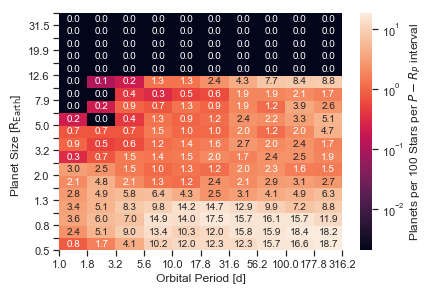

In [29]:
fig, ax = plt.subplots()
J34occ = plots.plot_occurrence(j34.data, ax=ax, xRange=(1.,300.), yRange=(0.5, 32.), kind='annotated', binWidth_dex=(0.25, 0.1), logColormap=True)

# workaround for axis labels
J34occ[3].set_xlabel('Orbital Period [d]')
J34occ[3].annotate('Planet Size [$\mathrm{R_{Earth}}$]', xy=(0.05,0.5), xytext=(0.02, 0.5), xycoords='figure fraction', textcoords='figure fraction', rotation=90, verticalalignment='center', size='larger')

In [35]:
# save as eps to avoid white lines between histogram cells
fig.savefig(outputs + 'J34/j34occurrence.eps')

# Occurrences of different planet types

We categorize planets into Super Earths (SE) or Cold Jupiters (CJ) according to the rules in Zhu & Wu 2018 (including the requirement for RV semi-amplitude K > 3 m/s)

In [52]:
j34.data = stats.categorizePlanets(j34.data, ZhuWu18=True)

In [53]:
j34CJ = j34.data[j34.data['planetType'] == 'ColdJupiter']
j34SE = j34.data[j34.data['planetType'] == 'SuperEarth']